In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('placement.csv')

In [18]:
print(df.head())
df.shape

   cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1


(100, 3)

<Axes: xlabel='cgpa', ylabel='resume_score'>

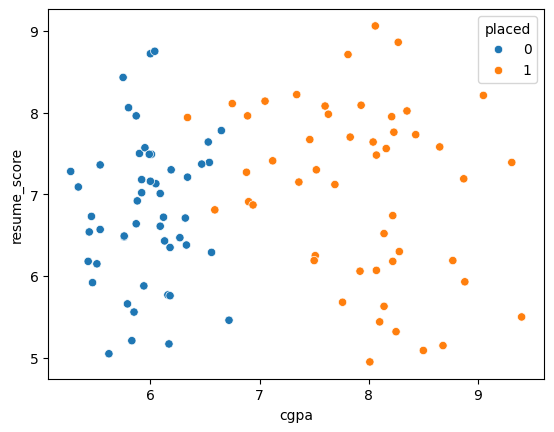

In [19]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)

In [20]:
x = df[['cgpa', 'resume_score']]
y = df['placed']

In [21]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [22]:
p.fit(x, y)

Perceptron()

In [23]:
p.coef_, p.intercept_

(array([[ 40.26, -36.  ]]), array([-25.]))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

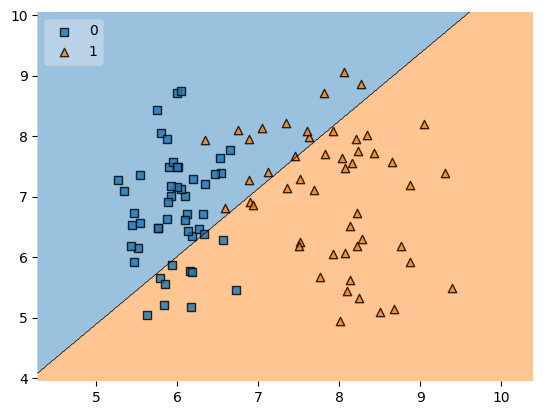

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=p, legend=2)

In [25]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [26]:
import matplotlib.pyplot as plt

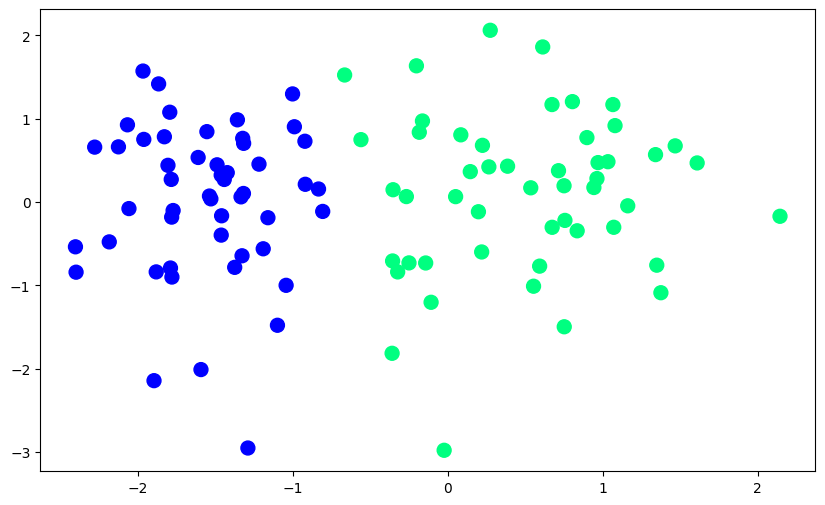

In [27]:
x = np.array(x)
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s = 100)

In [28]:
def step(z):
    return 1 if z > 0 else 0

In [29]:
def perceptron (x, y):

    x  = np.insert(x, 0, 1, axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(x[j], weights))
        weights += lr * (y[j] - y_hat) * x[j]
    
    return weights[0], weights[1:]


In [30]:
intercept_, coef_ = perceptron(x, y)

In [31]:
print(intercept_, coef_)

0.9 [1.37041691 0.10393981]


In [32]:
m = -coef_[0] / coef_[1]
b = -intercept_ / coef_[1]

In [33]:
x_input = np.linspace(-3, 3, 100)
y_output = m * x_input + b

(-3.0, 2.0)

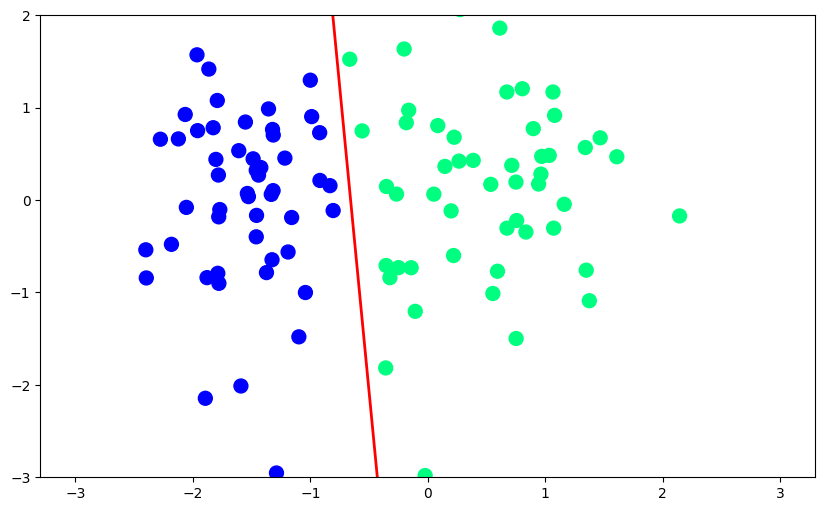

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_output, 'r', linewidth=2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s = 100)
plt.ylim(-3, 2)

In [35]:
from sklearn.datasets import make_classification
import numpy as np

x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

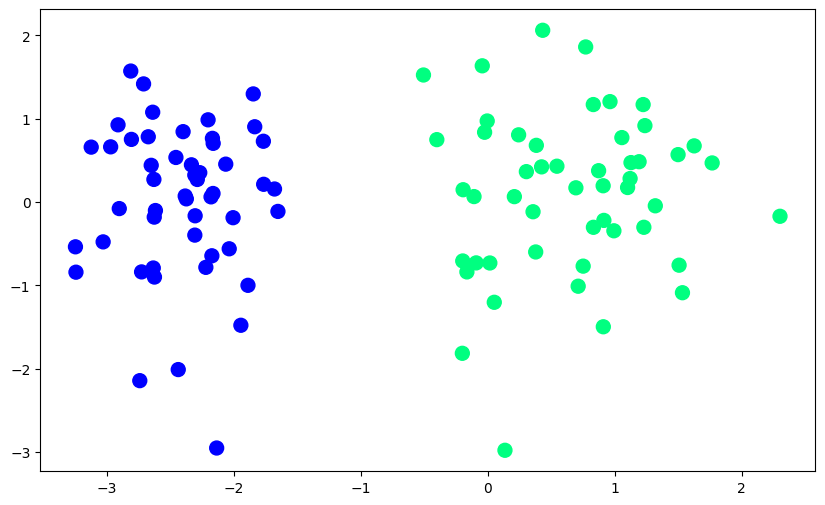

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s = 100)

In [40]:
def perceptron (x, y):

    w1 = w2 = b = 1
    lr = 0.1

    for j in range(1000):

        for i in range(x.shape[0]):

            z = w1*x[i][0] + w2*x[i][1] + b

            if z*y[i] <= 0:
                w1 += lr * x[i][0] * y[i]
                w2 += lr * x[i][1] * y[i]
                b += lr * y[i]

        

    return w1, w2, b

In [41]:
w1, w2, b = perceptron(x, y)

In [42]:
m = -w1 / w2
b = -b / w2

print(m, b)

-4.531321834268464 -5.851870329508209


In [43]:
x_input = np.linspace(-3, 3, 100)
y_output = m * x_input + b

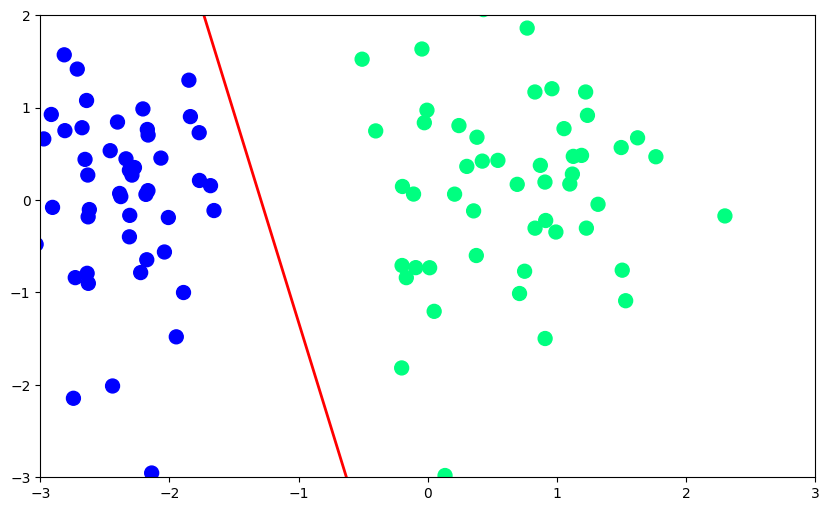

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_output, 'r', linewidth=2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s = 100)
plt.ylim(-3, 2)
plt.xlim(-3, 3)
plt.show()

# issues with perceptron

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [47]:
or_data['input1'] = [1, 1, 0, 0]
or_data['input2'] = [1, 0, 1, 0]
or_data['output'] = [1, 1, 1, 0]

In [48]:
and_data['input1'] = [1, 1, 0, 0]
and_data['input2'] = [1, 0, 1, 0]
and_data['output'] = [1, 0, 0, 0]

In [49]:
xor_data['input1'] = [1, 1, 0, 0]
xor_data['input2'] = [1, 0, 1, 0]
xor_data['output'] = [0, 1, 1, 0]

In [50]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

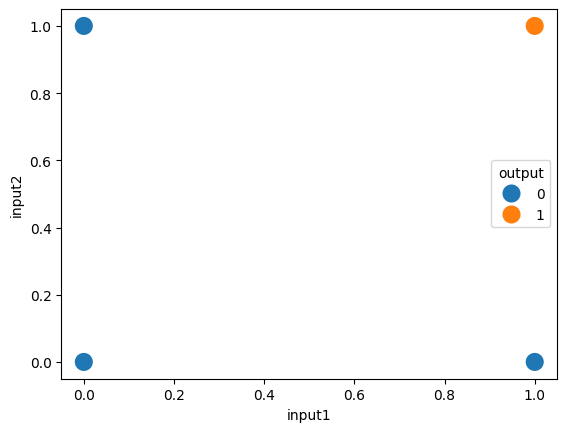

In [52]:
sns.scatterplot(x='input1', y='input2', hue='output', data=and_data, s = 200)

In [53]:
from sklearn.linear_model import Perceptron
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [54]:
clf1.fit(and_data[['input1', 'input2']], and_data['output'])
clf2.fit(or_data[['input1', 'input2']], or_data['output'])
clf3.fit(xor_data[['input1', 'input2']], xor_data['output'])

Perceptron()

In [55]:
print(clf1.coef_, clf1.intercept_)

[[2. 2.]] [-2.]


In [56]:
print(clf2.coef_, clf2.intercept_)

[[2. 2.]] [-1.]


In [58]:
print(clf3.coef_, clf3.intercept_)

[[0. 0.]] [0.]


In [59]:
x = np.linspace(-1, 1, 5)
y = -x + 1

<Axes: xlabel='input1', ylabel='input2'>

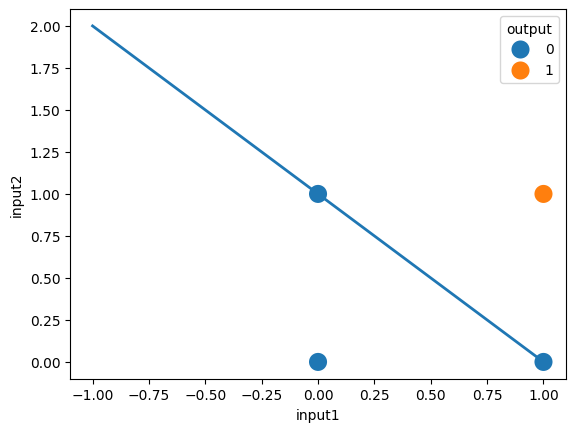

In [60]:
plt.plot(x, y, linewidth=2)
sns.scatterplot(x='input1', y='input2', hue='output', data=and_data, s = 200)

In [63]:
x = np.linspace(-1, 1, 5)
y = -x + 0.5

<Axes: xlabel='input1', ylabel='input2'>

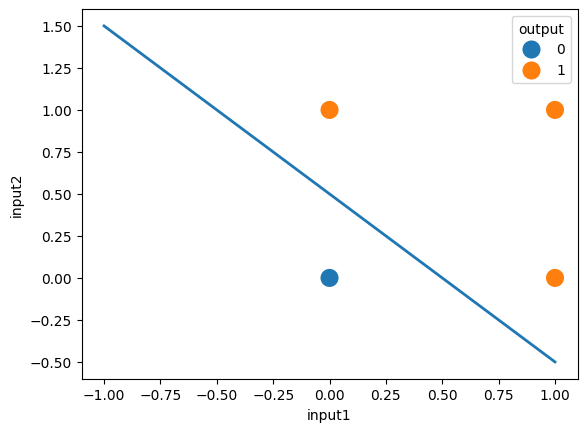

In [64]:
plt.plot(x, y, linewidth=2)
sns.scatterplot(x='input1', y='input2', hue='output', data=or_data, s = 200)

For XOR we can not make any boundary, so we can not classify the data


In [65]:
x = np.linspace(-1, 1, 5)
y = -x + 0.5

<Axes: xlabel='input1', ylabel='input2'>

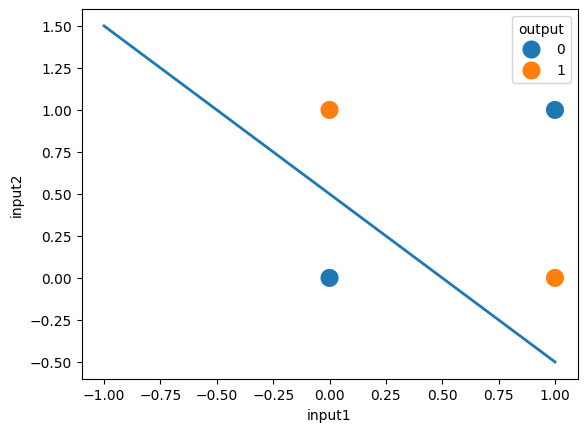

In [66]:
plt.plot(x, y, linewidth=2)
sns.scatterplot(x='input1', y='input2', hue='output', data=xor_data, s = 200)

# Perseptron use for only liner data